<a href="https://colab.research.google.com/github/Abhinaytechie/Excerl/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using **Nltk**

In [ ]:
sent="Ra is studying at Malla Reddy university at Hyderabad, India"

In [ ]:
import nltk


In [ ]:
nltk.download('words')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

In [ ]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.9 MB/s eta 0:00:00


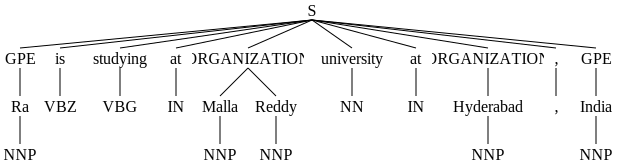

In [ ]:
from nltk import ne_chunk
from nltk import word_tokenize
#NER
ne_chunk(nltk.pos_tag(word_tokenize(sent)),binary=False)

In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(u'Apple is ready to launch new phone worth $10000 in New york time square')
for ent in doc.ents:
  print(ent.text,ent.start_char,ent.end_char,ent.label_)

Apple 0 5 ORG
10000 42 47 MONEY
New york 51 59 GPE


pretrainded english model

In [ ]:
nlp=spacy.load("en_core_web_sm")

In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')
text = "Elon Musk,the CEO of SpaceX and Tesla, announced that SpaceX's StarShip will be launched  its first crewed mission to march in 2027The mission, which will involve austronauts from NASA,will be the firsat of its kind,and it will takes place at Kennedy Space Center in Florida. Musk emphasized that the project would push the boundaries of space exploration..."
doc=nlp(text)
for ent in doc.ents:
    print(f"Entity:{ent.text},Label:{ent.label}")

Entity:Elon Musk,Label:380
Entity:SpaceX,Label:381
Entity:Tesla,Label:383
Entity:first,Label:396
Entity:2027The,Label:384
Entity:NASA,Label:383
Entity:Kennedy Space Center,Label:9191306739292312949
Entity:Florida,Label:384


In [ ]:
#### Sentiment Analysis !!!!

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('/content/sample_data/Reviews.csv',nrows=100)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      100 non-null    int64 
 1   ProductId               100 non-null    object
 2   UserId                  100 non-null    object
 3   ProfileName             100 non-null    object
 4   HelpfulnessNumerator    100 non-null    int64 
 5   HelpfulnessDenominator  100 non-null    int64 
 6   Score                   100 non-null    int64 
 7   Time                    100 non-null    int64 
 8   Summary                 100 non-null    object
 9   Text                    100 non-null    object
dtypes: int64(5), object(5)
memory usage: 7.9+ KB


In [ ]:
df.Summary.head()

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy


In [ ]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 7.4 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('textblob')
df['Text']=df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split() ))
df['Text']=df['Text'].str.replace('[^\w\s]','')
stop=stopwords.words('english')
df['Text']=df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text']=df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df['Text']=df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head();

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Error loading textblob: Package 'textblob' not found in
[nltk_data]     index


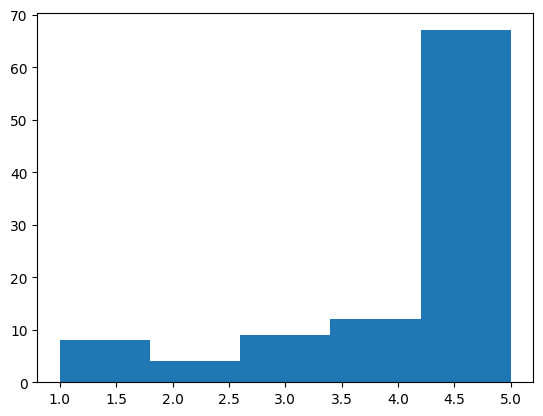

<bound method GroupBy.count of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7983acb93d50>>


In [ ]:
reviews=df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').Text.count)

In [ ]:
score1=reviews[reviews['Score']==1].sample(n=47, replace=True) #add replace = True, otherwise, there may not be 47 examples of score=1 in the dataset.
score2=reviews[reviews['Score']==2].sample(n=47, replace=True) #add replace = True, otherwise, there may not be 47 examples of score=2 in the dataset.
score3=reviews[reviews['Score']==3].sample(n=47, replace=True) #add replace = True, otherwise, there may not be 47 examples of score=3 in the dataset.
score4=reviews[reviews['Score']==4].sample(n=47, replace=True) #add replace = True, otherwise, there may not be 47 examples of score=4 in the dataset.
score5=reviews[reviews['Score']==5].sample(n=47, replace=True) #add replace = True, otherwise, there may not be 47 examples of score=5 in the dataset.

Score
1    47
2    47
3    47
4    47
5    47
Name: Text, dtype: int64


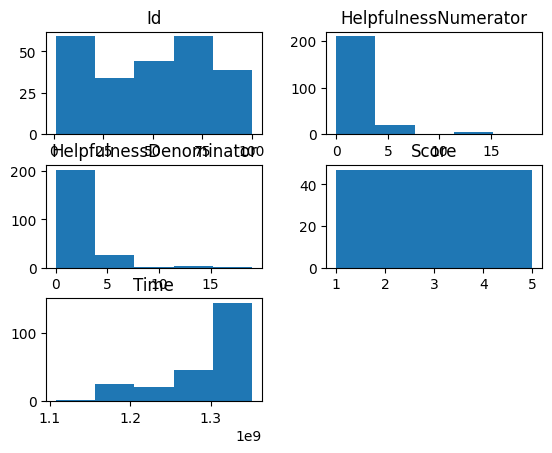

In [ ]:
reviews_sample=pd.concat([score1,score2,score3,score4,score5])
reviews_sample.reset_index(drop=True,inplace=True)
reviews_sample.Score.value_counts()
print(reviews_sample.groupby('Score').Text.count())
reviews_sample.hist(bins=5,grid=False)
plt.show()

In [ ]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.7 MB/s eta 0:00:00


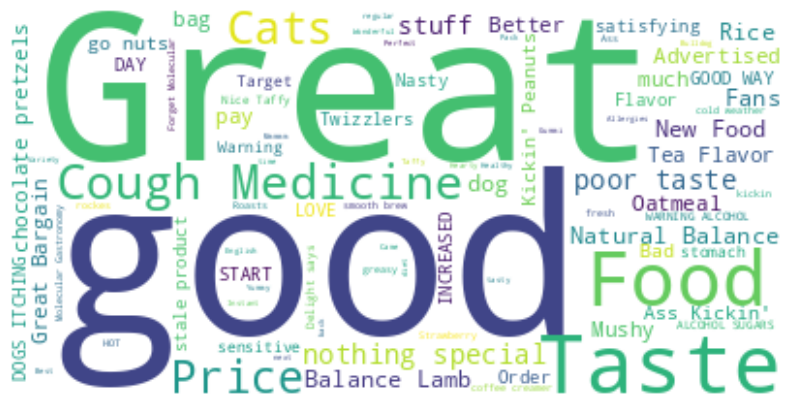

In [ ]:
from wordcloud import WordCloud
reviews_str=" ".join(reviews_sample["Summary"].to_numpy())
wordcloud=WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#Lets split data into negative (Score is 1 or 2)
negative_reviews=reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews=reviews_sample[reviews_sample['Score'].isin([4,5])]

negative_reviews_str=negative_reviews.Summary.str.cat()
positive_reviews_str=positive_reviews.Summary.str.cat()

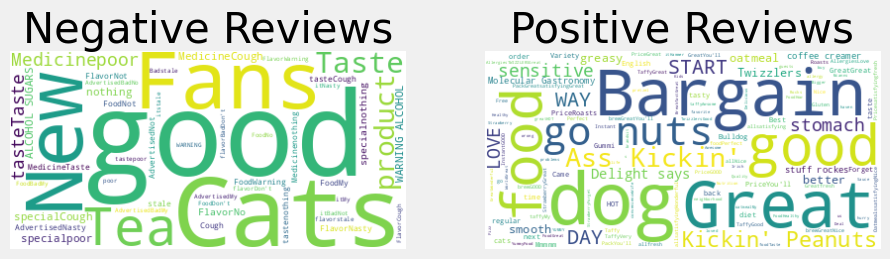

In [44]:
#Create wordclouds
wordcloud_negative=WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive=WordCloud(background_color='white').generate(positive_reviews_str)
#Plot
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title("Negative Reviews",fontsize=30)
ax2=fig.add_subplot(2,2,2)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title("Positive Reviews",fontsize=30)
plt.show()

In [37]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [39]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
cp=sns.color_palette()
analyzer=SentimentIntensityAnalyzer()
emptyline=[]
for row in df['Text']:
  vs=analyzer.polarity_scores(row)
  emptyline.append(vs)
df['compound']= [d.get('compound') for d in emptyline]
df_sent=pd.DataFrame(emptyline)
df_sent.head()

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.258,0.644,0.099,-0.5719
2,0.126,0.623,0.250,0.7880
3,0.000,0.868,0.132,0.4404
4,0.000,0.455,0.545,0.9186


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['neg'].plot(kind='hist', bins=20, title='neg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['neu'].plot(kind='hist', bins=20, title='neu')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['pos'].plot(kind='hist', bins=20, title='pos')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='neg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='neg', y='neu', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='neu', y='pos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='pos', y='compound', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['neg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('neg')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['neu']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('neu')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['pos']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('pos')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['compound']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('compound')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['neg'].plot(kind='line', figsize=(8, 4), title='neg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['neu'].plot(kind='line', figsize=(8, 4), title='neu')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['pos'].plot(kind='line', figsize=(8, 4), title='pos')
plt.gca().spines[['top', 'right']].set_visible(False)